In [4]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [5]:
cap = cv2.VideoCapture('../data/video1.mp4')
model = YOLO(model='../models/yolo11n.pt')

In [6]:
# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Width: {width}")
print(f"Height: {height}")
print(f"FPS: {fps}")
print(f"Total frames: {frame_count}")

Width: 1920
Height: 1080
FPS: 29.97002997002997
Total frames: 587


In [7]:
_, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

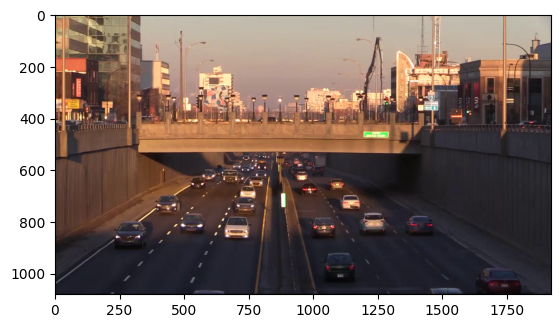

In [8]:
plt.imshow(frame)

In [9]:
results = model(source=frame, classes=[2])[0]


0: 384x640 17 cars, 104.1ms
Speed: 11.8ms preprocess, 104.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


In [10]:
print(results.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [11]:
for result in results:
    x,y,w,h=result.boxes.xywh[0].int()
    print(result.boxes.xywh[0].int())
    print(result.boxes.conf)
    print(result.names[int(result.boxes.cls)])

tensor([292, 853, 136, 106], dtype=torch.int32)
tensor([0.7782])
car
tensor([1037,  823,   95,   79], dtype=torch.int32)
tensor([0.7752])
car
tensor([530, 807,  97,  83], dtype=torch.int32)
tensor([0.7426])
car
tensor([704, 823, 106,  88], dtype=torch.int32)
tensor([0.7078])
car
tensor([1097,  975,  124,  113], dtype=torch.int32)
tensor([0.6750])
car
tensor([1228,  808,  106,   89], dtype=torch.int32)
tensor([0.6726])
car
tensor([1408,  814,  113,   81], dtype=torch.int32)
tensor([0.6699])
car
tensor([1712, 1027,  179,  103], dtype=torch.int32)
tensor([0.6166])
car
tensor([435, 735, 102,  75], dtype=torch.int32)
tensor([0.5374])
car
tensor([1142,  726,   76,   62], dtype=torch.int32)
tensor([0.4999])
car
tensor([981, 678,  62,  40], dtype=torch.int32)
tensor([0.4820])
car
tensor([951, 626,  45,  38], dtype=torch.int32)
tensor([0.4600])
car
tensor([1090,  658,   55,   40], dtype=torch.int32)
tensor([0.4155])
car
tensor([735, 745,  83,  62], dtype=torch.int32)
tensor([0.3621])
car
tensor

In [12]:
x

tensor(735, dtype=torch.int32)

In [13]:
cv2.rectangle(frame, [292-68, 853-53],  [292+68, 853+53], color = (0, 255, 0) )
cv2.putText(frame, 'car', (292-68, 853-53), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),4)


array([[[ 44,  45,  22],
        [ 60,  61,  38],
        [ 67,  69,  43],
        ...,
        [ 63,  59,  53],
        [ 55,  51,  45],
        [ 39,  35,  29]],

       [[ 72,  73,  50],
        [ 89,  90,  67],
        [ 99, 101,  75],
        ...,
        [ 96,  92,  86],
        [ 84,  80,  74],
        [ 67,  63,  57]],

       [[ 94,  95,  72],
        [115, 116,  93],
        [131, 133, 107],
        ...,
        [124, 120, 114],
        [107, 103,  97],
        [ 86,  82,  76]],

       ...,

       [[ 15,  19,  23],
        [ 16,  20,  24],
        [ 20,  24,  28],
        ...,
        [ 32,  32,  42],
        [ 28,  28,  38],
        [ 24,  24,  34]],

       [[ 12,  16,  20],
        [ 13,  17,  21],
        [ 15,  19,  23],
        ...,
        [ 23,  23,  33],
        [ 20,  20,  30],
        [ 18,  18,  28]],

       [[  8,  12,  16],
        [  9,  13,  17],
        [ 12,  16,  20],
        ...,
        [ 15,  15,  25],
        [ 13,  13,  23],
        [ 11,  11,  21]]

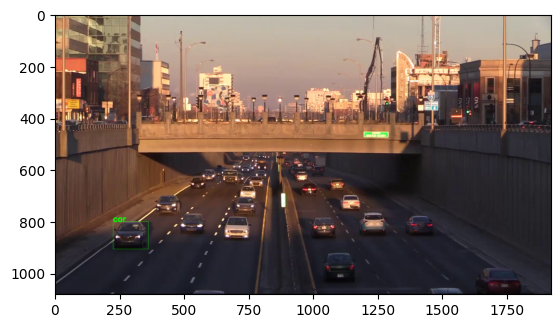

In [14]:
plt.imshow(frame)

In [16]:
cv2.line(frame, (250, 800), (1500, 800), (255, 0, 0), 2)

array([[[ 44,  45,  22],
        [ 60,  61,  38],
        [ 67,  69,  43],
        ...,
        [ 63,  59,  53],
        [ 55,  51,  45],
        [ 39,  35,  29]],

       [[ 72,  73,  50],
        [ 89,  90,  67],
        [ 99, 101,  75],
        ...,
        [ 96,  92,  86],
        [ 84,  80,  74],
        [ 67,  63,  57]],

       [[ 94,  95,  72],
        [115, 116,  93],
        [131, 133, 107],
        ...,
        [124, 120, 114],
        [107, 103,  97],
        [ 86,  82,  76]],

       ...,

       [[ 15,  19,  23],
        [ 16,  20,  24],
        [ 20,  24,  28],
        ...,
        [ 32,  32,  42],
        [ 28,  28,  38],
        [ 24,  24,  34]],

       [[ 12,  16,  20],
        [ 13,  17,  21],
        [ 15,  19,  23],
        ...,
        [ 23,  23,  33],
        [ 20,  20,  30],
        [ 18,  18,  28]],

       [[  8,  12,  16],
        [  9,  13,  17],
        [ 12,  16,  20],
        ...,
        [ 15,  15,  25],
        [ 13,  13,  23],
        [ 11,  11,  21]]

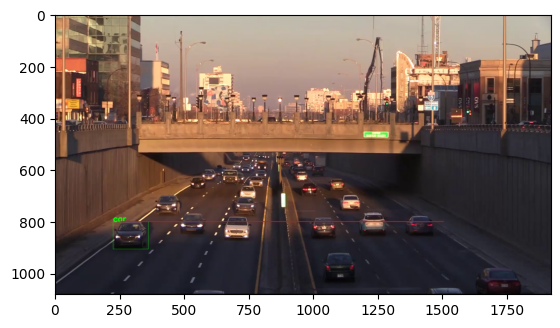

In [17]:
plt.imshow(frame)

In [18]:
from ultralytics.trackers.bot_sort import BOTrack

In [51]:
results.boxes.cls[0]
results.boxes.xywh[0].numpy()


array([     292.11,      853.37,      136.83,      106.23], dtype=float32)

In [42]:
tracks = BOTrack(xywh=np.append(results.boxes.xywh[0].numpy(), 0), 
                 score=float(results.boxes.conf[0]), 
                 cls= int(results.boxes.cls[0])
                 )

In [47]:
results.boxes.xywh.numpy()
np.concatenate(
    [results.boxes.xywh.numpy(), np.arange(len(results.boxes.xywh.numpy())).reshape(-1, 1)],
    axis=-1
)

array([[     292.11,      853.37,      136.83,      106.23,           0],
       [     1037.9,      823.86,      95.638,      79.893,           1],
       [     530.63,      807.76,      97.442,      83.901,           2],
       [     704.11,      823.11,      106.07,      88.531,           3],
       [       1098,      975.33,      124.55,      113.68,           4],
       [     1228.3,      808.82,      106.66,       89.85,           5],
       [     1408.8,      814.09,      113.73,      81.711,           6],
       [     1712.7,      1027.6,      179.69,      103.77,           7],
       [     435.77,      735.89,      102.76,      75.424,           8],
       [     1142.5,      726.68,      76.836,      62.082,           9],
       [     981.61,      678.67,      62.499,      40.012,          10],
       [     951.75,      626.71,      45.677,      38.232,          11],
       [     1090.8,      658.28,      55.121,       40.99,          12],
       [     735.33,      745.06,     

In [54]:
tracks.state

0